In [111]:
## Project 2

In [112]:
## Yunzhe Tang

In [113]:
## Task 1

In [114]:
import matplotlib.pyplot as plt

In [115]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        # write your code here.
        return np.random.uniform(mu - sigma/(3**0.5), mu + sigma/(3**0.5), n)
      
        pass
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")
y_test

array([ 0.04620246, -0.02733986, -0.1196323 ,  0.09889547,  0.1605623 ])

In [116]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")
n = 105
a = 0
b = 0
for i in range(n):
    a += y1[i]
    b += y2[i]
meany1 = a/n
meany2 = b/n
print(meany1)
print(meany2)

0.35472612048158747
0.5411378550724293


In [117]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x = 0
    obej = []
    def object_func(x):
        sum = 0
        for i in range(n):
            sum += (x - y[i])**2
        return sum*0.5
    for k in range(n):
        m = ordering[k]
        x = x - 1/(k + 1)*(x - y[m])
        obej.append(object_func(x))
    return obej,x
    pass

In [118]:
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x = 0
    obej = []
    def object_func(x):
        sum = 0
        for i in range(n):
            sum += (x - y[i])**2
        return sum*0.5
    for k in range(n):
        m = ordering[k]
        x = x - 1/(k + 1)*(x - y[m])
        obej.append(object_func(x))
    return obej,x
    pass

In [119]:
hist1_1_1,xk1_1_1=IGD_wr_task1(y1)
hist1_1_2,xk1_1_2=IGD_wo_task1(y1)
hist1_2_1,xk1_2_1=IGD_wr_task1(y2)
hist1_2_2,xk1_2_2=IGD_wo_task1(y2)
print(xk1_1_1)
print(xk1_1_2)
print(xk1_2_1)
print(xk1_2_2)

0.37568117969059167
0.35472612048158736
0.5653952725914825
0.5411378550724293


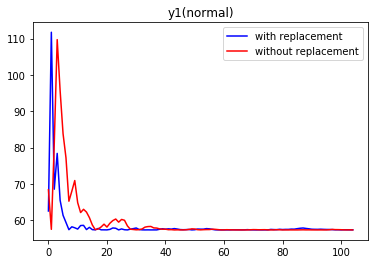

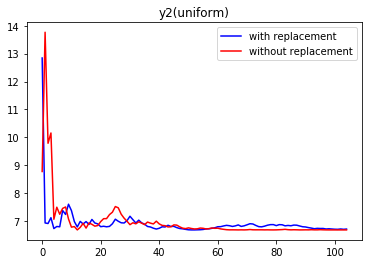

In [120]:
plt.figure()
plt.title('y1(normal)')
x_axis = range(len(y1))
plt.plot(x_axis,hist1_1_1,color='blue',label='with replacement')
plt.plot(x_axis,hist1_1_2,color='red',label='without replacement')
plt.legend()
plt.figure()
plt.title('y2(uniform)')
x_axis = range(len(y2))
plt.plot(x_axis,hist1_2_1,color='blue',label='with replacement')
plt.plot(x_axis,hist1_2_2,color='red',label='without replacement')
plt.legend()

In [121]:
## The second method (without replacement) is better.
## Brief proof:
## We can use induction to prove that xk = mean.
## Without replacement means that the index of each yik is distinctm, which means all n yi will be chosen in n steps.
## Base case, let k = 1. Then x1 = y1 = mean.
## Assume when k = n, xk = 1/k * sum of y's.
## When k = n+1, xk+1 = xk - 1/(k+1) * (xk - yk+1) = 1/(k+1) * (y1 + ... + yk) + 1/(k + 1) * yk+1 
## = 1/(k+1) * (y1 + ... + yk+1)
## Therefore, xk = mean of the sum of y's.

In [122]:
## Task 2

In [123]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(beta,y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    gamma = 0.95*min(1/beta)
    x = 0
    obej = []
    def object_func(x):
        sum = 0
        for i in range(n):
            sum += beta[i]*(x - y)**2
        return sum*0.5
    for k in range(n):
        m = ordering[k]
        x = x - gamma*beta[m]*(x - y)
        obej.append(object_func(x))
    return obej,x
    pass

In [124]:
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(beta,y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    gamma = 0.95*min(1/beta)
    x = 0
    obej = []
    def object_func(x):
        sum = 0
        for i in range(n):
            sum += beta[i]*(x - y)**2
        return sum*0.5
    for k in range(n):
        m = ordering[k]
        x = x - gamma*beta[m]*(x - y)
        obej.append(object_func(x))
    return obej,x
    pass

In [125]:
beta = np.random.uniform(1,2,105)
hist2_1_1,xk2_1_1=IGD_wr_task2(beta,666)
hist2_1_2,xk2_1_2=IGD_wo_task2(beta,666)
hist2_2_1,xk2_2_1=IGD_wr_task2(beta,77)
hist2_2_2,xk2_2_2=IGD_wo_task2(beta,77)
print(xk2_1_1)
print(xk2_1_2)
print(xk2_2_1)
print(xk2_2_2)

666.0
666.0
77.0
77.0


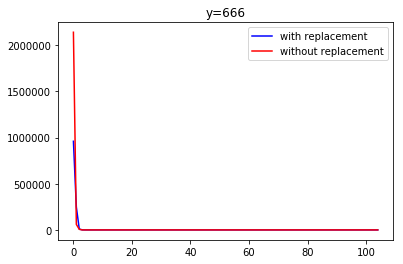

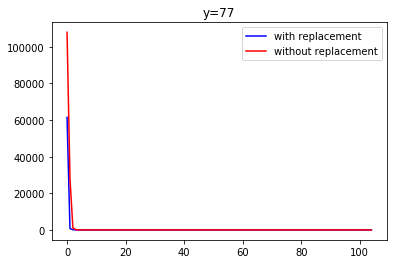

In [126]:
plt.figure()
plt.title('y=666')
x_axis = range(len(y1))
plt.plot(x_axis,hist2_1_1,color='blue',label='with replacement')
plt.plot(x_axis,hist2_1_2,color='red',label='without replacement')
plt.legend()
plt.figure()
plt.title('y=77')
x_axis = range(len(y2))
plt.plot(x_axis,hist2_2_1,color='blue',label='with replacement')
plt.plot(x_axis,hist2_2_2,color='red',label='without replacement')
plt.legend()

In [127]:
## Set y = 666 and 77. Running for several times, it seems that without replacement method converges faster, even 
## though the plots of these two methods nearly overlap.

In [128]:
## Task 3

In [129]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [130]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)
print(xstar)

[0.71123934 0.74161903 0.71919001 0.30461604 0.34149708 0.25944785
 0.85284351 0.87772705 0.48055323 0.84745881 0.50808282 0.08430177
 0.51512877 0.11042864 0.09721226 0.98509846 0.20799047 0.39571977
 0.14103221 0.0876424  0.55894318 0.2945062  0.21183665 0.01952243
 0.49618336 0.83255748 0.58245107 0.99847964 0.2588375  0.12111805
 0.56367993 0.08907193 0.51339076 0.66231182 0.43046647 0.44231798
 0.05564786 0.43998403 0.48940273 0.46415858 0.84884398 0.12121977
 0.27363193 0.99881966 0.35889548 0.31695556 0.28656087 0.14409731
 0.43735546 0.29665871 0.82455233 0.58639848 0.45847077 0.38706472
 0.02954101 0.31197331 0.16420166 0.52441341 0.50761286 0.40226179
 0.56765784 0.19384072 0.01111932 0.77197108 0.11619764 0.94139286
 0.9735381  0.45621685 0.74116235 0.49336811 0.03249954 0.1462469
 0.65784247 0.27154672 0.57911644 0.90108374 0.66794439 0.59592076
 0.20531799 0.59855097 0.5901212  0.37494172 0.70438057 0.31431675
 0.15917235 0.90494525 0.5239634  0.51999645 0.87797641 0.11653

In [131]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    n = A.shape[0]
    w = A.shape[1]
    ordering = np.random.choice(n,n,replace=True)
    x = np.zeros(w)
    xhist = np.zeros([w,n+1])
    gamma = 1e-3
    obej = []
    def object_func(x):
        sum = 0
        for i in range(n):
            sum += (np.matmul(A[i,:],x) - y[i])**2
        return sum
    for k in range(n):
        m = ordering[k]
        v = A[m,:]
        x = x - gamma*v*(np.matmul(v,x) - y[m])
        obej.append(object_func(x))
        xhist[:, k+1] = x
    return obej,x,xhist
    pass

In [132]:
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    n = A.shape[0]
    w = A.shape[1]
    ordering = np.random.choice(n,n,replace=False)
    x = np.zeros(w)
    xhist = np.zeros([w,n+1])
    gamma = 1e-3
    obej = []
    def object_func(x):
        sum = 0
        for i in range(n):
            sum += (np.matmul(A[i,:],x) - y[i])**2
        return sum
    for k in range(n):
        m = ordering[k]
        v = A[m,:]
        x = x - gamma*v*(np.matmul(v,x) - y[m])
        obej.append(object_func(x))
        xhist[:, k+1] = x
    return obej,x,xhist
    pass

In [133]:
hist3_1_1,xk3_1_1,xhist3_1_1=IGD_wr_task3(y,A)
hist3_1_2,xk3_1_2,xhist3_1_2=IGD_wo_task3(y,A)
print(xk3_1_1)
print(xk3_1_2)

[ 0.10213856  0.0482172   0.14289138  0.00686006  0.13101304  0.00735751
  0.0079149   0.01932164  0.08407138  0.15431187  0.05102612 -0.13519071
  0.08739328  0.0779178   0.00797432  0.13280737  0.06300187 -0.12312485
  0.11993851 -0.03469528  0.14847636  0.04214971  0.0296766  -0.02010575
  0.08109511  0.10676644  0.2405026   0.23562508 -0.20977308  0.10355569
  0.05585809 -0.09531238  0.00350454  0.12725725  0.17257725  0.15072917
  0.03316379  0.17451379  0.00744961  0.19981532  0.01723968  0.02761731
 -0.01407853  0.18747025  0.09422276  0.20007973 -0.06016256  0.06647034
  0.08421376  0.00565573  0.09729689  0.14939374  0.07154234  0.1461488
 -0.02650904 -0.08341131  0.04370004  0.03226987  0.1031821   0.05753861
  0.15014443  0.03203844 -0.05841941  0.09161574 -0.04814029  0.25195174
  0.13277646 -0.02430196  0.10473235  0.1574395  -0.14581549 -0.11345918
  0.21410021  0.04322183  0.1312086   0.19587433  0.12852688  0.05538518
  0.09312922 -0.01302629  0.08917433  0.05052958  0.

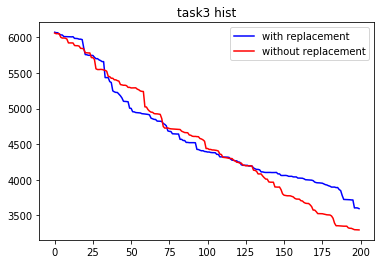

In [134]:
plt.figure()
plt.title('task3 hist')
x_axis = range(len(hist3_1_1))
plt.plot(x_axis,hist3_1_1,color='blue',label='with replacement')
plt.plot(x_axis,hist3_1_2,color='red',label='without replacement')
plt.legend()

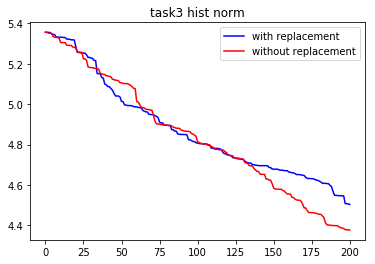

In [135]:
from numpy import linalg as LA
normwr = np.zeros(A.shape[0]+1)
normwo = np.zeros(A.shape[0]+1)
for i in range(A.shape[0]+1):
    normwr[i] = LA.norm(xhist3_1_1[:,i] - xstar)
    normwo[i] = LA.norm(xhist3_1_2[:,i] - xstar)
plt.figure()
plt.title('task3 hist norm')
plt.plot(np.arange(201),normwr,color='blue',label='with replacement')
plt.plot(np.arange(201),normwo,color='red',label='without replacement')
plt.legend()

In [136]:
## Without replacement converges better.